In [24]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import plotly.express as px
import plotly.figure_factory as ff

# DATAFRAME

In [25]:
data = pd.read_csv('../kc_house_data_train.csv')

In [26]:
data.shape

(17290, 22)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 22 columns):
Unnamed: 0       17290 non-null int64
id               17290 non-null int64
date             17290 non-null object
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: float64(5), int64(16), object(1)
mem

In [28]:
data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [29]:
data.tail()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17285,17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,...,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,...,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,...,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,...,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028
17289,17289,6703100135,20150116T000000,348000.0,3,1.50,1330,6768,1.0,0,...,7,1330,0,1952,0,98155,47.7366,-122.319,1320,6910


#### Distribution

/Users/MichaelWirtz/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7c646bc88>,
      dtype=object)

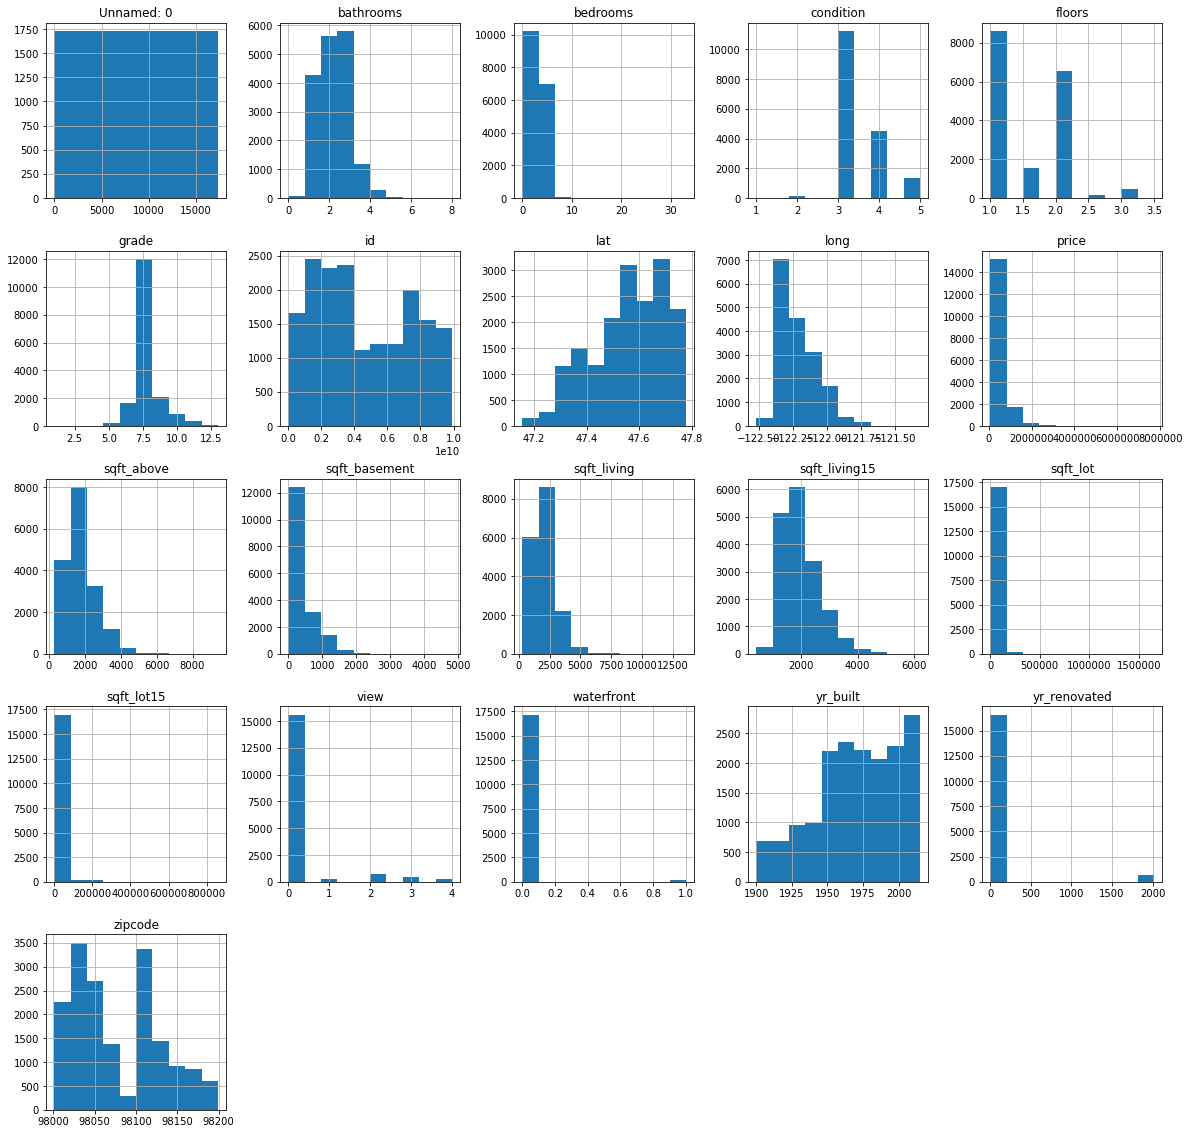

In [30]:
fig, ax = plt.subplots(figsize=(20,20))
data.hist(ax=ax)

#### Correlation

In [31]:
correlation = data.corr()

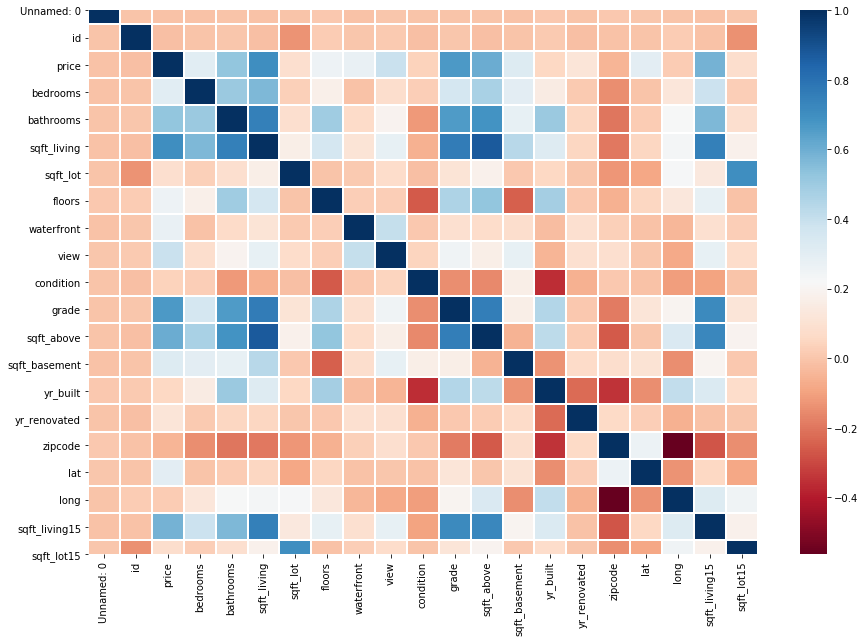

In [32]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(correlation, linewidths=1, ax=ax, xticklabels = correlation.columns, yticklabels = correlation.columns, cmap='RdBu')

In [33]:
# data_before = data

# x1 = sm.tools.add_constant(data_before)

# series_before = pd.Series([variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])], index = x1.columns)

# print(series_before)

In [34]:
# pd.plotting.scatter_matrix(data, alpha=1, figsize=(30,30))

## How to resolve the fact that there are so many variables to graph

In [35]:
abs(data.corr()) > 0.75

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Unnamed: 0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
id,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,True,True,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


#### Outliers

In [36]:
desc_data = data.describe()

#add standard deviation metric
desc_data.loc['+3_std'] = desc_data.loc['50%'] + (desc_data.loc['std']*3)
desc_data.loc['-3_std'] = desc_data.loc['50%'] - (desc_data.loc['std']*3)

desc_data.loc['+5_std'] = desc_data.loc['50%'] + (desc_data.loc['std']*5)
desc_data.loc['-5_std'] = desc_data.loc['50%'] - (desc_data.loc['std']*5)

desc_data

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,...,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,...,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,...,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,...,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,...,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000
+3_std,23618.512238,1.252762e+10,1.569957e+06,5.818037,4.561429,4680.055618,1.345559e+05,3.116728,0.266954,2.325687,...,10.524155,4047.795321,1329.455623,2062.030548,1200.988129,98225.823847,47.986837,-121.807428,3894.407904,89304.812750
-3_std,-6329.512238,-4.720317e+09,-6.699569e+05,0.181963,-0.061429,-840.055618,-1.192719e+05,-0.116728,-0.266954,-2.325687,...,3.475845,-927.795321,-1329.455623,1885.969452,-1200.988129,97904.176153,47.156363,-122.652572,-214.407904,-74059.812750


In [37]:
# check on these extreme values to see if they are an error or a real value!!!!
# DO NOT REMOVE REAL OBSERVED VALUES
#PRICE: ALL REAL VALUES
#BEDROOMS: 33 *NOT A REAL OBSERVED VALUE
    #Most correlated with sqft_living
    #Replace 33 with mean of bedrooms for houses with sqft_living btw 1000 and 2000
#BATHROOMS: ALL REAL VALUES
#SQFT_LIVING: ALL REAL VALUES
#SQFT_LOT: ALL REAL VALUES
    #Some crazy values that may skew however
#SQFT_ABOVE: ALL REAL VALUES
#SQFT_BASEMENT: ALL REAL VALUES
#SQFT_LIVING15: ALL REAL VALUES
#SQFT_LOT15: ALL REAL VALUES
    #some crazy values that may skew however
    

In [38]:
test = data[data.sqft_living < 2000]
new_test = data[data.sqft_living > 1000]
new_value = new_test.bedrooms.median()
data.bedrooms = data.bedrooms.apply(lambda x: new_value if x == 33 else x)

#### Dropping

In [39]:
data = data.drop(columns=['Unnamed: 0','id'])

#### Date Column

In [40]:
data['date_year'] = data.date.apply(lambda x: int(x[:4]))
data['date_month'] = data.date.apply(lambda x: int(x[4:6]))
data['date_day'] = data.date.apply(lambda x: int(x[6:8]))
data.drop('date',axis=1, inplace=True)

In [41]:
data.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day
0,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,...,1986,0,98058,47.4388,-122.162,2390,7700,2014,10,6
1,865000.0,5.0,3.00,2900,6730,1.0,0,0,5,8,...,1977,0,98115,47.6784,-122.285,2370,6283,2014,8,21


In [42]:
%store data

Stored 'data' (DataFrame)


In [58]:
data.zipcode

0        98058
1        98115
2        98006
3        98034
4        98052
         ...  
17285    98008
17286    98105
17287    98028
17288    98038
17289    98155
Name: zipcode, Length: 17290, dtype: int64

# VARIABLES

## PRICE

In [46]:
data.price.describe()

count    1.729000e+04
mean     5.407395e+05
std      3.733190e+05
min      7.500000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [47]:
data.price.agg(['min','median','max'])

min         75000.0
median     450000.0
max       7700000.0
Name: price, dtype: float64

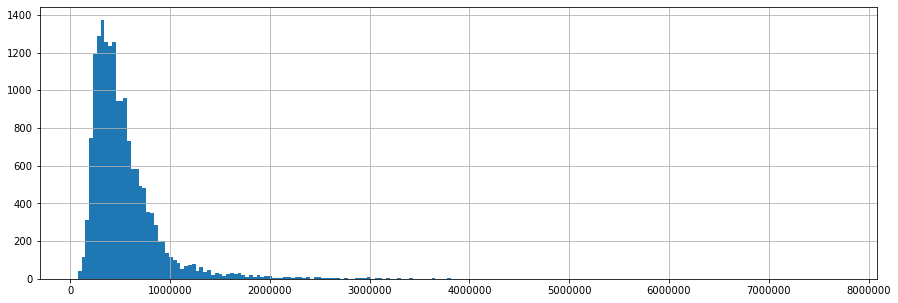

In [48]:
data.price.hist(bins=200, figsize=(15,5))

## DATE

(array([11703.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5587.]),
 array([2014. , 2014.1, 2014.2, 2014.3, 2014.4, 2014.5, 2014.6, 2014.7,
        2014.8, 2014.9, 2015. ]),
 <a list of 10 Patch objects>)

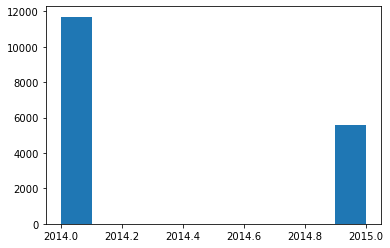

In [51]:
plt.hist(data.date_year)

(array([1782., 1496., 1804., 1928., 1753., 1761., 1561., 1388., 1493.,
        2324.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

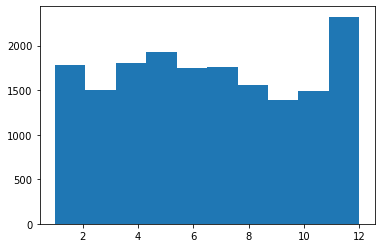

In [53]:
plt.hist(data.date_month)

(array([1584., 1763., 1736., 1745., 1619., 1814., 1695., 1956., 1710.,
        1668.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <a list of 10 Patch objects>)

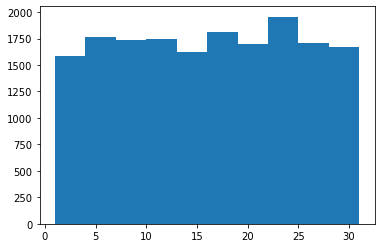

In [54]:
plt.hist(data.date_day)

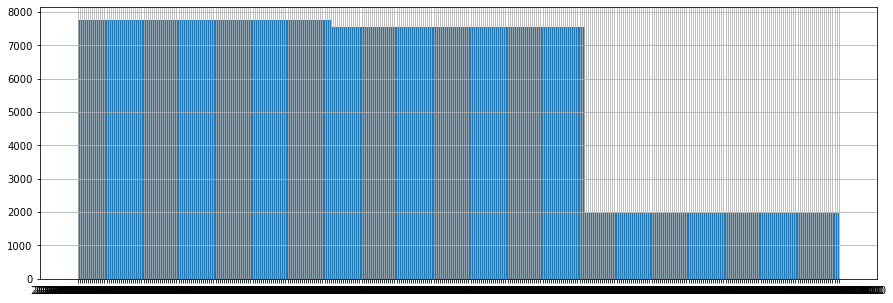

In [245]:
data.date.hist(bins = 3, figsize=(15,5))

Issue: elements are messy

Solution: take T0s from elements and separate year-month-day

Issue: too many categorical options

Solution: turn series into desired number of bins based on timeframe

In [23]:
data.head(2)

NameError: name 'data' is not defined

## BEDROOMS

In [95]:
data.bedrooms.describe()

count    17290.000000
mean         3.372470
std          0.939346
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

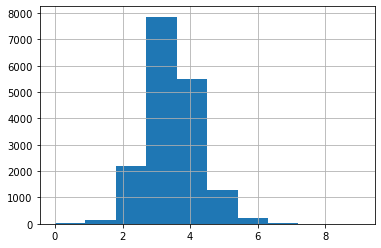

In [19]:
mess = data[data.bedrooms < 10]
mess.bedrooms.hist()

In [99]:
bedrooms_price = ols(formula='price~bedrooms', data=data).fit()
bedrooms_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     1775.
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        22:52:14   Log-Likelihood:            -2.4552e+05
No. Observations:               17290   AIC:                         4.910e+05
Df Residuals:                   17288   BIC:                         4.911e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.318e+05   1.01e+04     13.080      0.000    1.12e+05    1.52e+05
bedrooms    1.213e+05   2878.489     42.125      0.000    1.16e+05    1.27e+05
==============================================================================
Omnibus:                    15815.502   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1179534.875
Skew:                           4.159   Prob(JB):                         0.00
Kurtosis:                      42.599   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

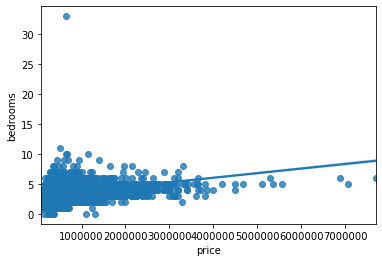

In [100]:
sns.regplot(data.price, data.bedrooms)

Issue: one element = 33

Solution: check to see other elements of house to see if its a mistake. 

If mistake:
 - drop row
 - use most likely value based on other houses with similar metrics
 
If not mistake:
 - hang on to value as is

In [15]:
data[data.bedrooms >4]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
16,16,862000020,20150206T000000,800000.0,6,1.00,1430,20620,2.0,0,...,7,1430,0,1954,0,98004,47.6255,-122.209,2450,10080
20,20,2291401425,20140910T000000,485000.0,5,2.00,1910,5508,1.0,0,...,7,1020,890,1968,0,98133,47.7074,-122.349,1030,7440
36,36,3629860060,20150312T000000,827500.0,5,4.25,3920,5823,2.0,0,...,9,3000,920,2000,0,98029,47.5492,-122.008,3000,5297
42,42,9264450460,20140603T000000,309000.0,5,2.75,2481,4045,2.0,0,...,8,2481,0,2014,0,98001,47.2602,-122.284,2363,4175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17258,17258,6820100035,20141112T000000,493000.0,6,1.75,2120,3801,1.5,0,...,7,1220,900,1925,0,98115,47.6832,-122.311,1850,4181
17263,17263,5210200410,20141114T000000,840000.0,5,2.75,2790,20824,1.0,0,...,9,1680,1110,1959,0,98115,47.6948,-122.282,2380,10465
17279,17279,1925059254,20150507T000000,2998000.0,5,4.00,6670,16481,2.0,0,...,12,4960,1710,2007,0,98004,47.6409,-122.221,4800,16607
17281,17281,1251200045,20140620T000000,1462500.0,5,3.25,3840,4800,3.0,0,...,10,2750,1090,2008,0,98144,47.5929,-122.290,2060,4800


## BATHROOMS

In [102]:
data.bathrooms.describe()

count    17290.000000
mean         2.111943
std          0.770476
min          0.000000
25%          1.500000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

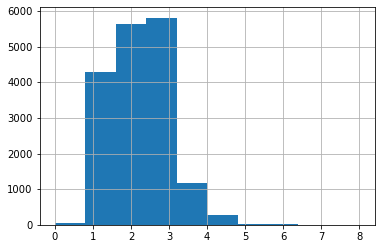

In [103]:
data.bathrooms.hist()

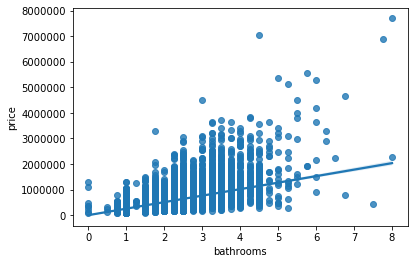

In [106]:
sns.regplot(data.bathrooms, data.price)

In [107]:
data[data.bathrooms == 8]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3275,3275,1225069038,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
10366,10366,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [20]:
data.bathrooms.value_counts()

2.50    4322
1.00    3100
1.75    2431
2.25    1666
2.00    1549
1.50    1168
2.75     896
3.00     592
3.50     591
3.25     455
3.75     135
4.00     107
4.50      76
4.25      64
0.75      52
5.00      17
4.75      16
5.25      11
0.00       8
5.50       7
1.25       6
6.00       6
5.75       3
0.50       3
8.00       2
6.75       2
6.25       2
7.50       1
6.50       1
7.75       1
Name: bathrooms, dtype: int64

## SQFT_LIVING

In [108]:
data.sqft_living.describe()

count    17290.000000
mean      2081.464604
std        920.018539
min        290.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

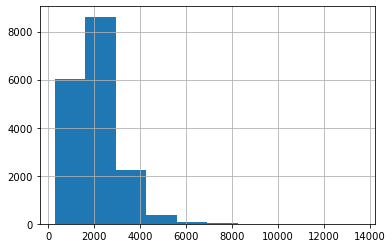

In [109]:
data.sqft_living.hist()

In [115]:
data[data.sqft_living >= 8000]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1979,1979,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
2232,2232,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
3275,3275,1225069038,20140505T000000,2280000.0,7,8.00,13540,307752,3.0,0,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
4217,4217,2303900035,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,...,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
6903,6903,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7183,7183,6072800246,20140702T000000,3300000.0,5,6.25,8020,21738,2.0,0,...,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969
7519,7519,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
10366,10366,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
14668,14668,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
15816,15816,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454


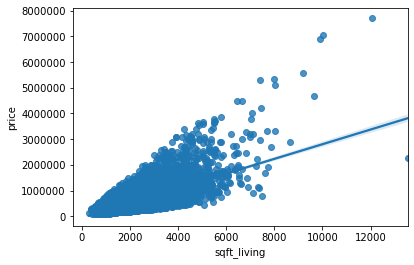

In [116]:
sns.regplot(data.sqft_living, data.price)

## SQFT_LOT

In [117]:
data.sqft_lot.describe()

count    1.729000e+04
mean     1.524340e+04
std      4.230462e+04
min      5.720000e+02
25%      5.081250e+03
50%      7.642000e+03
75%      1.072575e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

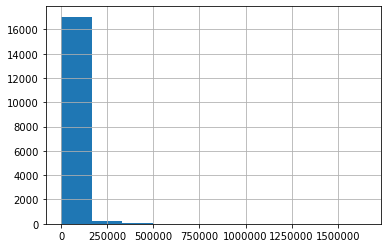

In [118]:
data.sqft_lot.hist()

In [122]:
data[data.sqft_lot >= 75000]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17,17,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
22,22,3525069037,20141120T000000,920000.0,3,2.75,2590,223027,2.0,0,...,9,2590,0,1983,0,98074,47.6145,-122.001,3410,212137
30,30,2220069003,20150223T000000,425000.0,3,2.75,1360,542322,1.0,0,...,7,1140,220,1955,0,98022,47.2069,-122.024,1700,60548
91,91,5112800060,20140606T000000,455000.0,4,1.75,2050,94525,1.0,0,...,7,1250,800,1959,0,98058,47.4492,-122.084,2270,47480
110,110,2720069019,20141103T000000,316000.0,3,1.75,1120,98445,1.5,0,...,7,1120,0,1917,0,98022,47.1853,-122.017,1620,34200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17080,17080,8887001140,20140723T000000,562000.0,3,3.00,3290,80471,2.0,0,...,8,2330,960,1975,0,98070,47.5040,-122.464,1830,30494
17081,17081,821079102,20141017T000000,780000.0,4,3.50,3720,213073,1.0,0,...,10,3720,0,2007,0,98010,47.3216,-121.940,2190,59241
17149,17149,220069083,20140509T000000,705000.0,2,2.50,2200,188200,1.0,0,...,8,2200,0,2007,0,98022,47.2458,-122.002,2700,84942
17199,17199,1624079104,20150402T000000,540000.0,3,2.25,2000,217800,2.0,0,...,8,2000,0,1996,0,98024,47.5599,-121.911,2220,217800


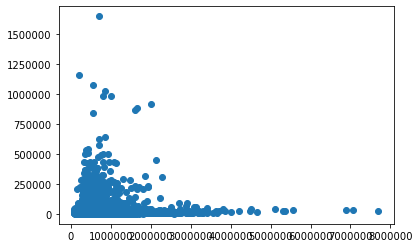

In [55]:
plt.scatter(data.price,data.sqft_lot)

## FLOORS

In [123]:
data.floors.describe()

count    17290.000000
mean         1.490312
std          0.538909
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

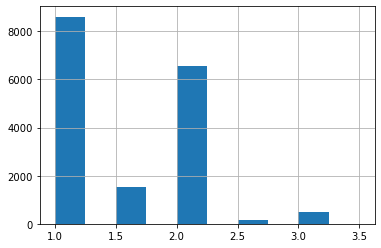

In [124]:
data.floors.hist()

In [126]:
data.floors.corr(data.price)

0.25698507185137387

## WATERFRONT

In [127]:
data.waterfront.describe()

count    17290.000000
mean         0.007981
std          0.088985
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [130]:
len(data[data.waterfront == 1])

138

In [131]:
waterfront = data[data.waterfront == 1]

In [132]:
print(waterfront.price.median() - data.price.median())

955000.0


In [135]:
waterfront

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
67,67,7204200025,20141028T000000,1225000.0,4,2.50,3120,49456,2.0,1,...,9,2590,530,1974,1989,98198,47.3535,-122.323,2030,32181
238,238,4114601570,20141118T000000,3600000.0,3,3.25,5020,12431,2.0,1,...,10,3420,1600,1941,2002,98144,47.5925,-122.287,3680,12620
260,260,4217402115,20150421T000000,3650000.0,6,4.75,5480,19401,1.5,1,...,11,3910,1570,1936,0,98105,47.6515,-122.277,3510,15810
494,494,3761700053,20150105T000000,2150000.0,3,2.75,3470,9610,3.0,1,...,11,3470,0,1989,2000,98034,47.7205,-122.260,4130,11875
544,544,1568100920,20150408T000000,1950000.0,4,2.50,3440,14554,2.0,1,...,8,2170,1270,2012,0,98155,47.7364,-122.286,3170,11810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16425,16425,121039083,20150206T000000,629000.0,3,1.75,1460,12367,2.0,1,...,8,1120,340,1970,0,98023,47.3311,-122.375,1970,18893
16571,16571,7936500190,20141021T000000,1339000.0,4,3.75,2130,34689,1.5,1,...,9,2130,0,1955,0,98136,47.5489,-122.398,3030,28598
16755,16755,518500480,20140811T000000,3000000.0,3,3.50,4410,10756,2.0,1,...,11,3430,980,2014,0,98056,47.5283,-122.205,3550,5634
17214,17214,3124059023,20150213T000000,1955000.0,3,1.75,3330,12566,1.0,1,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560


## VIEW

In [136]:
data.view.describe()

count    17290.000000
mean         0.238519
std          0.775229
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [249]:
data.view.value_counts()

0    15571
2      775
3      410
4      270
1      264
Name: view, dtype: int64

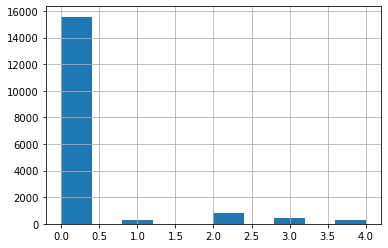

In [138]:
data.view.hist()

In [139]:
view_price = ols(formula='price~view', data=data).fit()
view_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     3205.
Date:                Sat, 17 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:58:19   Log-Likelihood:            -2.4490e+05
No. Observations:               17290   AIC:                         4.898e+05
Df Residuals:                   17288   BIC:                         4.898e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.953e+05   2728.367    181.542      0.000     4.9e+05    5.01e+05
view        1.904e+05   3363.905     56.616      0.000    1.84e+05    1.97e+05
==============================================================================
Omnibus:                    15114.105   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1032332.157
Skew:                           3.884   Prob(JB):                         0.00
Kurtosis:                      40.049   Cond. No.                         1.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## CONDITION

In [140]:
data.condition.describe()

count    17290.000000
mean         3.408502
std          0.651296
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [141]:
data.condition.unique()

array([4, 5, 3, 2, 1])

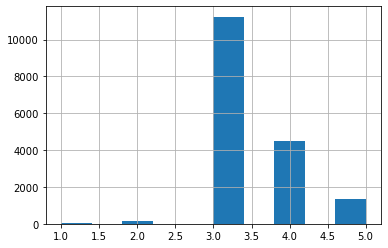

In [142]:
data.condition.hist()

In [144]:
condition_price = ols(formula='price~condition', data=data).fit()
condition_price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     22.56
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           2.06e-06
Time:                        11:00:04   Log-Likelihood:            -2.4636e+05
No. Observations:               17290   AIC:                         4.927e+05
Df Residuals:                   17288   BIC:                         4.927e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.702e+05   1.51e+04     31.103      0.000    4.41e+05       5e+05
condition   2.069e+04   4356.587      4.750      0.000    1.22e+04    2.92e+04
==============================================================================
Omnibus:                    16039.329   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1126871.116
Skew:                           4.285   Prob(JB):                         0.00
Kurtosis:                      41.610   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## GRADE

In [145]:
data.grade.describe()

count    17290.000000
mean         7.654425
std          1.174718
min          1.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [146]:
data.grade.unique()

array([ 8, 11, 12,  9,  7,  6, 10,  5, 13,  4,  3,  1])

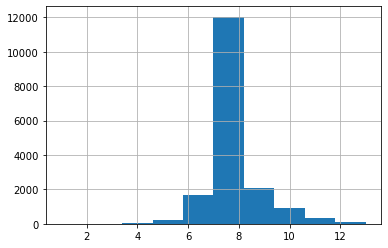

In [147]:
data.grade.hist()

## SQFT_ABOVE

In [148]:
data.sqft_above.describe()

count    17290.000000
mean      1789.306015
std        829.265107
min        290.000000
25%       1200.000000
50%       1560.000000
75%       2214.500000
max       9410.000000
Name: sqft_above, dtype: float64

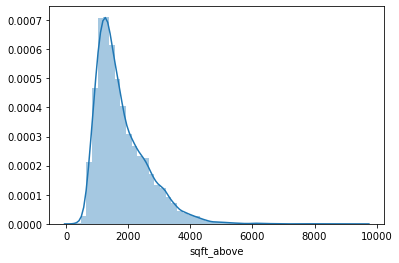

In [149]:
sns.distplot(data.sqft_above)

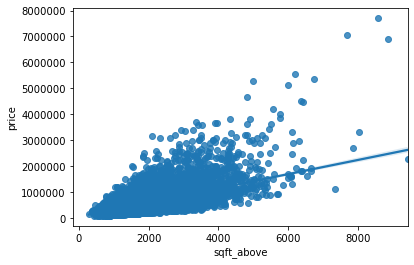

In [150]:
sns.regplot(data.sqft_above, data.price)

In [151]:
data.sqft_above.corr(data.price)

0.6077596929372432

In [152]:
data[data.sqft_above > 5000]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21,21,2025770560,20141103T000000,930000.0,4,4.25,5710,24663,2.0,0,...,11,5710,0,2007,0,98092,47.3065,-122.158,4060,23847
220,220,5316101075,20140926T000000,2885000.0,7,3.00,5350,14400,2.5,0,...,10,5020,330,1910,0,98112,47.6295,-122.285,3050,7469
275,275,853600310,20140828T000000,1610000.0,5,4.50,6085,142725,3.0,0,...,11,6085,0,2000,0,98014,47.6085,-121.952,4830,128457
622,622,7631800015,20150407T000000,2510000.0,3,3.25,5480,57990,2.0,1,...,11,5480,0,1991,0,98166,47.4558,-122.371,2500,22954
940,940,622069006,20140820T000000,1500000.0,4,5.50,6550,217374,1.0,0,...,11,5400,1150,2006,0,98058,47.4302,-122.095,4110,50378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16454,16454,3023069166,20140708T000000,1135250.0,5,4.00,7320,217800,2.0,0,...,11,7320,0,1992,0,98058,47.4473,-122.086,3270,34500
16681,16681,3425059222,20141124T000000,1300000.0,6,3.50,6563,32670,2.0,0,...,10,5153,1410,2002,0,98005,47.6078,-122.157,2610,22651
16814,16814,6065300370,20150506T000000,4208000.0,5,6.00,7440,21540,2.0,0,...,12,5550,1890,2003,0,98006,47.5692,-122.189,4740,19329
16950,16950,7237500590,20141117T000000,1320000.0,4,5.25,6110,10369,2.0,0,...,11,6110,0,2005,0,98059,47.5285,-122.135,4190,10762


## SQFT_BASEMENT

In [153]:
data.sqft_basement.describe()

count    17290.000000
mean       292.158589
std        443.151874
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

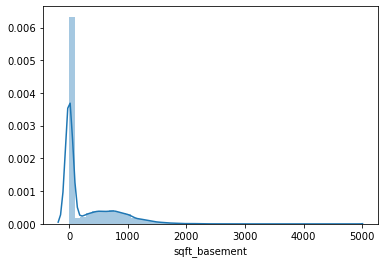

In [154]:
sns.distplot(data.sqft_basement)

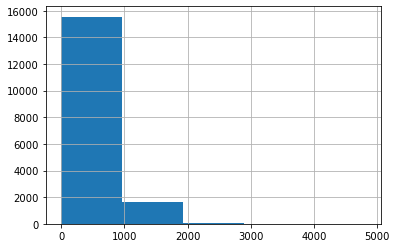

In [156]:
data.sqft_basement.hist(bins=5)

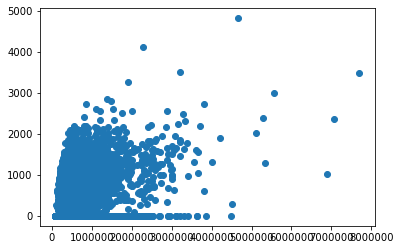

In [56]:
plt.scatter(data.price,data.sqft_basement)

## YR_BUILT

In [157]:
data.yr_built.describe()

count    17290.000000
mean      1970.792019
std         29.343516
min       1900.000000
25%       1951.000000
50%       1974.000000
75%       1996.000000
max       2015.000000
Name: yr_built, dtype: float64

(array([ 683.,  693.,  953.,  988., 2203., 2362., 2228., 2072., 2295.,
        2813.]),
 array([1900. , 1911.5, 1923. , 1934.5, 1946. , 1957.5, 1969. , 1980.5,
        1992. , 2003.5, 2015. ]),
 <a list of 10 Patch objects>)

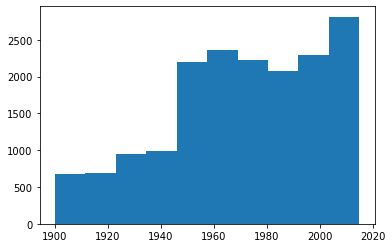

In [177]:
plt.hist(data.yr_built)

(array([ 5520., 11770.]),
 array([1900. , 1957.5, 2015. ]),
 <a list of 2 Patch objects>)

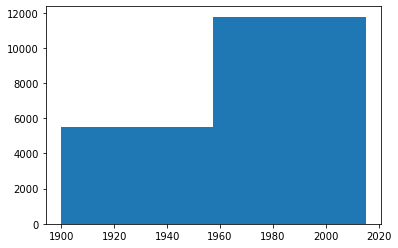

In [178]:
plt.hist(data.yr_built, bins=2)

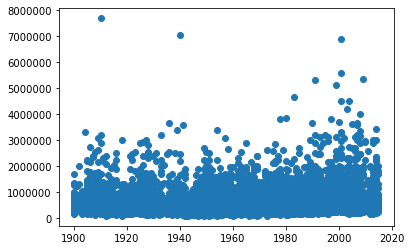

In [179]:
plt.scatter(data.yr_built, data.price)

## YR_RENOVATED

In [180]:
data.yr_renovated.describe()

count    17290.000000
mean        83.806304
std        400.329376
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

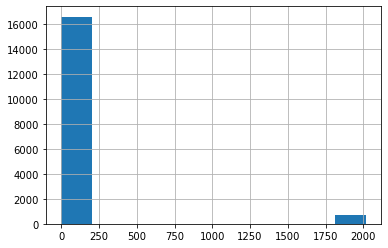

In [181]:
data.yr_renovated.hist()

In [184]:
len(data[data.yr_renovated != 0]) / len(data)

0.041989589358010414

## ZIPCODE

In [185]:
data.zipcode.describe()

count    17290.000000
mean     98078.193175
std         53.607949
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

In [186]:
len(data.zipcode.unique())

70

In [97]:
zipcode = data.zipcode.apply(lambda x: str(x)[-3:])
zipcode.apply(lambda x: int(x))

0         58
1        115
2          6
3         34
4         52
        ... 
17285      8
17286    105
17287     28
17288     38
17289    155
Name: zipcode, Length: 17290, dtype: int64

## LAT & LONG

In [243]:
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

In [244]:
geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
geometry[:3]

## SQFT_LIVING15

In [206]:
data.sqft_living15.describe()

count    17290.000000
mean      1987.986698
std        684.802635
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64

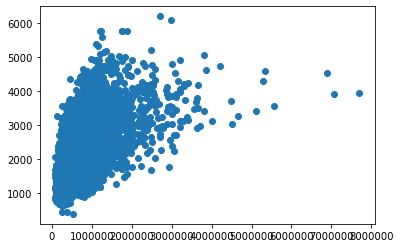

In [208]:
plt.scatter(data.price, data.sqft_living15)

In [209]:
data.sqft_living15.corr(data.price)

0.585567070225493

## SQFT_LOT15

In [210]:
data.sqft_lot15.describe()

count     17290.000000
mean      12873.475824
std       27227.437583
min         659.000000
25%        5111.250000
50%        7622.500000
75%       10101.750000
max      858132.000000
Name: sqft_lot15, dtype: float64

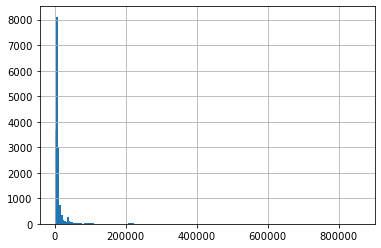

In [228]:
data.sqft_lot15.hist(bins=200)

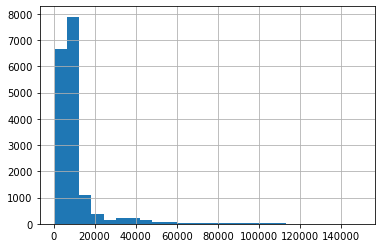

In [233]:
sqft_lot15 = data[data.sqft_lot15 < 150000 ]
sqft_lot15.sqft_lot15.hist(bins=25)

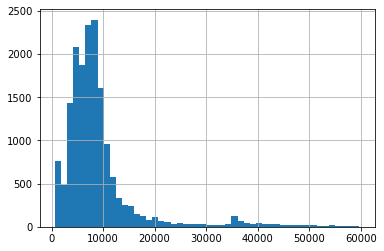

In [235]:
sqft_lot15 = data[data.sqft_lot15 < 60000 ]
sqft_lot15.sqft_lot15.hist(bins=50)

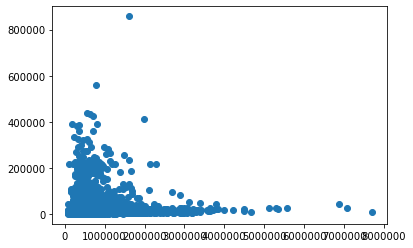

In [57]:
plt.scatter(data.price,data.sqft_lot15)